In [1]:
cd ../../..

/home/users/cdonoso/upastromer/astromer


/home/users/cdonoso/miniconda3/lib/python3.11/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np

import glob
import os

from tensorflow.keras.losses import CategoricalCrossentropy
from presentation.pipelines.steps.model_design import load_pt_model, build_classifier 
from presentation.pipelines.steps.load_data import build_loader 

pd.options.mode.chained_assignment = None  # default='warn'
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

%load_ext autoreload
%autoreload 2

2024-10-09 11:58:26.607413: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-09 11:58:26.607457: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-09 11:58:26.607479: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-09 11:58:26.615363: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
root = './presentation/results/final/astromer_1/'

In [4]:
n_classes = {'alcock': 6, 'atlas': 5}

In [5]:
results = {'alcock': {}, 'atlas':{}}
for ds_name in ['alcock', 'atlas']:
    for spc in [20, 100]:
        fold_gammas = []
        for fold_n in range(3):
        
            ft_case = '{}/fold_{}/{}_{}'.format(ds_name, fold_n, ds_name, spc)
            curr = os.path.join(root, 'classification', ft_case, 'skip_avg_mlp')

            astromer, model_config = load_pt_model(os.path.join(root, 'finetuning', ft_case))

            model = build_classifier(astromer, 
                                    model_config, 
                                    False, 
                                    n_classes[ds_name],
                                    arch='skip_avg_mlp')

            model.load_weights(os.path.join(curr, 'weights'))
            gamma_values = model.get_layer('gamma_weight').gamma.numpy()
            fold_gammas.append(gamma_values)

        results[ds_name][spc] =  fold_gammas
        
    

[INFO] Loading BASE
[INFO] Temperature: 2.50
[INFO] Mask format: K


2024-10-09 11:58:55.783070: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:268] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2024-10-09 11:58:55.783110: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:168] retrieving CUDA diagnostic information for host: pececillo
2024-10-09 11:58:55.783117: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:175] hostname: pececillo
2024-10-09 11:58:55.783206: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:199] libcuda reported version is: 535.104.5
2024-10-09 11:58:55.783232: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:203] kernel reported version is: 535.104.5
2024-10-09 11:58:55.783238: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:309] kernel version seems to match DSO: 535.104.5


[INFO] Using skip_avg_mlp clf architecture with base
[INFO] Loading BASE
[INFO] Temperature: 2.50
[INFO] Mask format: K
[INFO] Using skip_avg_mlp clf architecture with base


2024-10-09 11:58:58,096 - WARNING - Detecting that an object or model or tf.train.Checkpoint is being deleted with unrestored values. See the following logs for the specific values in question. To silence these warnings, use `status.expect_partial()`. See https://www.tensorflow.org/api_docs/python/tf/train/Checkpoint#restorefor details about the status object returned by the restore function.


2024-10-09 11:58:58,097 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._iterations


2024-10-09 11:58:58,098 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._learning_rate


2024-10-09 11:58:58,099 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.1


2024-10-09 11:58:58,099 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.2


2024-10-09 11:58:58,100 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.3


2024-10-09 11:58:58,101 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.4


2024-10-09 11:58:58,102 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.5


2024-10-09 11:58:58,103 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.6


2024-10-09 11:58:58,104 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.7


2024-10-09 11:58:58,105 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.8


2024-10-09 11:58:58,106 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.9


2024-10-09 11:58:58,106 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.10


2024-10-09 11:58:58,107 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.11


2024-10-09 11:58:58,108 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.12


2024-10-09 11:58:58,109 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.13


2024-10-09 11:58:58,110 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.14


2024-10-09 11:58:58,111 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.15


2024-10-09 11:58:58,112 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.16


2024-10-09 11:58:58,112 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.17


2024-10-09 11:58:58,113 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.18


2024-10-09 11:58:58,114 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.19


2024-10-09 11:58:58,115 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.20


2024-10-09 11:58:58,116 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.21


2024-10-09 11:58:58,117 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.22


[INFO] Loading BASE
[INFO] Temperature: 2.50
[INFO] Mask format: K
[INFO] Using skip_avg_mlp clf architecture with base


2024-10-09 11:58:59,045 - WARNING - Detecting that an object or model or tf.train.Checkpoint is being deleted with unrestored values. See the following logs for the specific values in question. To silence these warnings, use `status.expect_partial()`. See https://www.tensorflow.org/api_docs/python/tf/train/Checkpoint#restorefor details about the status object returned by the restore function.


2024-10-09 11:58:59,046 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._iterations


2024-10-09 11:58:59,047 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._learning_rate


2024-10-09 11:58:59,048 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.1


2024-10-09 11:58:59,049 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.2


2024-10-09 11:58:59,049 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.3


2024-10-09 11:58:59,050 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.4


2024-10-09 11:58:59,051 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.5


2024-10-09 11:58:59,052 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.6


2024-10-09 11:58:59,053 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.7


2024-10-09 11:58:59,054 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.8


2024-10-09 11:58:59,055 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.9


2024-10-09 11:58:59,056 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.10


2024-10-09 11:58:59,057 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.11


2024-10-09 11:58:59,058 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.12


2024-10-09 11:58:59,059 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.13


2024-10-09 11:58:59,060 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.14


2024-10-09 11:58:59,060 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.15


2024-10-09 11:58:59,061 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.16


2024-10-09 11:58:59,062 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.17


2024-10-09 11:58:59,063 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.18


2024-10-09 11:58:59,064 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.19


2024-10-09 11:58:59,065 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.20


2024-10-09 11:58:59,066 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.21


2024-10-09 11:58:59,067 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.22


[INFO] Loading BASE
[INFO] Temperature: 2.50
[INFO] Mask format: K
[INFO] Using skip_avg_mlp clf architecture with base


2024-10-09 11:58:59,849 - WARNING - Detecting that an object or model or tf.train.Checkpoint is being deleted with unrestored values. See the following logs for the specific values in question. To silence these warnings, use `status.expect_partial()`. See https://www.tensorflow.org/api_docs/python/tf/train/Checkpoint#restorefor details about the status object returned by the restore function.


2024-10-09 11:58:59,851 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._iterations


2024-10-09 11:58:59,851 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._learning_rate


2024-10-09 11:58:59,852 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.1


2024-10-09 11:58:59,853 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.2


2024-10-09 11:58:59,853 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.3


2024-10-09 11:58:59,854 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.4


2024-10-09 11:58:59,854 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.5


2024-10-09 11:58:59,855 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.6


2024-10-09 11:58:59,855 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.7


2024-10-09 11:58:59,856 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.8


2024-10-09 11:58:59,857 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.9


2024-10-09 11:58:59,857 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.10


2024-10-09 11:58:59,858 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.11


2024-10-09 11:58:59,858 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.12


2024-10-09 11:58:59,859 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.13


2024-10-09 11:58:59,859 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.14


2024-10-09 11:58:59,860 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.15


2024-10-09 11:58:59,860 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.16


2024-10-09 11:58:59,861 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.17


2024-10-09 11:58:59,861 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.18


2024-10-09 11:58:59,862 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.19


2024-10-09 11:58:59,862 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.20


2024-10-09 11:58:59,866 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.21


2024-10-09 11:58:59,867 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.22


[INFO] Loading BASE
[INFO] Temperature: 2.50
[INFO] Mask format: K
[INFO] Using skip_avg_mlp clf architecture with base


2024-10-09 11:59:00,645 - WARNING - Detecting that an object or model or tf.train.Checkpoint is being deleted with unrestored values. See the following logs for the specific values in question. To silence these warnings, use `status.expect_partial()`. See https://www.tensorflow.org/api_docs/python/tf/train/Checkpoint#restorefor details about the status object returned by the restore function.


2024-10-09 11:59:00,647 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._iterations


2024-10-09 11:59:00,648 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._learning_rate


2024-10-09 11:59:00,649 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.1


2024-10-09 11:59:00,650 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.2


2024-10-09 11:59:00,650 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.3


2024-10-09 11:59:00,651 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.4


2024-10-09 11:59:00,651 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.5


2024-10-09 11:59:00,652 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.6


2024-10-09 11:59:00,652 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.7


2024-10-09 11:59:00,653 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.8


2024-10-09 11:59:00,653 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.9


2024-10-09 11:59:00,654 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.10


2024-10-09 11:59:00,654 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.11


2024-10-09 11:59:00,655 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.12


2024-10-09 11:59:00,656 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.13


2024-10-09 11:59:00,656 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.14


2024-10-09 11:59:00,657 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.15


2024-10-09 11:59:00,659 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.16


2024-10-09 11:59:00,660 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.17


2024-10-09 11:59:00,660 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.18


2024-10-09 11:59:00,661 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.19


2024-10-09 11:59:00,661 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.20


2024-10-09 11:59:00,662 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.21


2024-10-09 11:59:00,663 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.22


[INFO] Loading BASE
[INFO] Temperature: 2.50
[INFO] Mask format: K
[INFO] Using skip_avg_mlp clf architecture with base


2024-10-09 11:59:01,383 - WARNING - Detecting that an object or model or tf.train.Checkpoint is being deleted with unrestored values. See the following logs for the specific values in question. To silence these warnings, use `status.expect_partial()`. See https://www.tensorflow.org/api_docs/python/tf/train/Checkpoint#restorefor details about the status object returned by the restore function.


2024-10-09 11:59:01,385 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._iterations


2024-10-09 11:59:01,386 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._learning_rate


2024-10-09 11:59:01,387 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.1


2024-10-09 11:59:01,387 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.2


2024-10-09 11:59:01,388 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.3


2024-10-09 11:59:01,389 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.4


2024-10-09 11:59:01,390 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.5


2024-10-09 11:59:01,391 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.6


2024-10-09 11:59:01,392 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.7


2024-10-09 11:59:01,393 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.8


2024-10-09 11:59:01,394 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.9


2024-10-09 11:59:01,395 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.10


2024-10-09 11:59:01,396 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.11


2024-10-09 11:59:01,397 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.12


2024-10-09 11:59:01,398 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.13


2024-10-09 11:59:01,399 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.14


2024-10-09 11:59:01,400 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.15


2024-10-09 11:59:01,401 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.16


2024-10-09 11:59:01,402 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.17


2024-10-09 11:59:01,403 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.18


2024-10-09 11:59:01,404 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.19


2024-10-09 11:59:01,405 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.20


2024-10-09 11:59:01,405 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.21


2024-10-09 11:59:01,407 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.22


[INFO] Loading BASE
[INFO] Temperature: 2.50
[INFO] Mask format: K
[INFO] Using skip_avg_mlp clf architecture with base


2024-10-09 11:59:02,150 - WARNING - Detecting that an object or model or tf.train.Checkpoint is being deleted with unrestored values. See the following logs for the specific values in question. To silence these warnings, use `status.expect_partial()`. See https://www.tensorflow.org/api_docs/python/tf/train/Checkpoint#restorefor details about the status object returned by the restore function.


2024-10-09 11:59:02,151 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._iterations


2024-10-09 11:59:02,152 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._learning_rate


2024-10-09 11:59:02,153 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.1


2024-10-09 11:59:02,154 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.2


2024-10-09 11:59:02,155 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.3


2024-10-09 11:59:02,155 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.4


2024-10-09 11:59:02,156 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.5


2024-10-09 11:59:02,158 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.6


2024-10-09 11:59:02,159 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.7


2024-10-09 11:59:02,160 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.8


2024-10-09 11:59:02,160 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.9


2024-10-09 11:59:02,161 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.10


2024-10-09 11:59:02,162 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.11


2024-10-09 11:59:02,163 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.12


2024-10-09 11:59:02,164 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.13


2024-10-09 11:59:02,165 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.14


2024-10-09 11:59:02,166 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.15


2024-10-09 11:59:02,167 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.16


2024-10-09 11:59:02,168 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.17


2024-10-09 11:59:02,169 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.18


2024-10-09 11:59:02,170 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.19


2024-10-09 11:59:02,171 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.20


2024-10-09 11:59:02,172 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.21


2024-10-09 11:59:02,173 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.22


[INFO] Loading BASE
[INFO] Temperature: 2.50
[INFO] Mask format: K
[INFO] Using skip_avg_mlp clf architecture with base


2024-10-09 11:59:02,921 - WARNING - Detecting that an object or model or tf.train.Checkpoint is being deleted with unrestored values. See the following logs for the specific values in question. To silence these warnings, use `status.expect_partial()`. See https://www.tensorflow.org/api_docs/python/tf/train/Checkpoint#restorefor details about the status object returned by the restore function.


2024-10-09 11:59:02,922 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._iterations


2024-10-09 11:59:02,923 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._learning_rate


2024-10-09 11:59:02,924 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.1


2024-10-09 11:59:02,925 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.2


2024-10-09 11:59:02,926 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.3


2024-10-09 11:59:02,927 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.4


2024-10-09 11:59:02,928 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.5


2024-10-09 11:59:02,928 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.6


2024-10-09 11:59:02,929 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.7


2024-10-09 11:59:02,930 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.8


2024-10-09 11:59:02,931 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.9


2024-10-09 11:59:02,932 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.10


2024-10-09 11:59:02,933 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.11


2024-10-09 11:59:02,934 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.12


2024-10-09 11:59:02,935 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.13


2024-10-09 11:59:02,936 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.14


2024-10-09 11:59:02,937 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.15


2024-10-09 11:59:02,938 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.16


2024-10-09 11:59:02,939 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.17


2024-10-09 11:59:02,940 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.18


2024-10-09 11:59:02,940 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.19


2024-10-09 11:59:02,941 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.20


2024-10-09 11:59:02,942 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.21


2024-10-09 11:59:02,943 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.22


[INFO] Loading BASE
[INFO] Temperature: 2.50
[INFO] Mask format: K
[INFO] Using skip_avg_mlp clf architecture with base


2024-10-09 11:59:03,750 - WARNING - Detecting that an object or model or tf.train.Checkpoint is being deleted with unrestored values. See the following logs for the specific values in question. To silence these warnings, use `status.expect_partial()`. See https://www.tensorflow.org/api_docs/python/tf/train/Checkpoint#restorefor details about the status object returned by the restore function.


2024-10-09 11:59:03,751 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._iterations


2024-10-09 11:59:03,752 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._learning_rate


2024-10-09 11:59:03,752 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.1


2024-10-09 11:59:03,753 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.2


2024-10-09 11:59:03,755 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.3


2024-10-09 11:59:03,755 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.4


2024-10-09 11:59:03,756 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.5


2024-10-09 11:59:03,757 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.6


2024-10-09 11:59:03,757 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.7


2024-10-09 11:59:03,758 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.8


2024-10-09 11:59:03,759 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.9


2024-10-09 11:59:03,759 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.10


2024-10-09 11:59:03,760 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.11


2024-10-09 11:59:03,760 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.12


2024-10-09 11:59:03,761 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.13


2024-10-09 11:59:03,761 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.14


2024-10-09 11:59:03,762 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.15


2024-10-09 11:59:03,762 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.16


2024-10-09 11:59:03,764 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.17


2024-10-09 11:59:03,765 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.18


2024-10-09 11:59:03,765 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.19


2024-10-09 11:59:03,765 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.20


2024-10-09 11:59:03,766 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.21


2024-10-09 11:59:03,766 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.22


[INFO] Loading BASE
[INFO] Temperature: 2.50
[INFO] Mask format: K
[INFO] Using skip_avg_mlp clf architecture with base


2024-10-09 11:59:04,512 - WARNING - Detecting that an object or model or tf.train.Checkpoint is being deleted with unrestored values. See the following logs for the specific values in question. To silence these warnings, use `status.expect_partial()`. See https://www.tensorflow.org/api_docs/python/tf/train/Checkpoint#restorefor details about the status object returned by the restore function.


2024-10-09 11:59:04,513 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._iterations


2024-10-09 11:59:04,514 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._learning_rate


2024-10-09 11:59:04,515 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.1


2024-10-09 11:59:04,516 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.2


2024-10-09 11:59:04,516 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.3


2024-10-09 11:59:04,517 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.4


2024-10-09 11:59:04,518 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.5


2024-10-09 11:59:04,519 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.6


2024-10-09 11:59:04,519 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.7


2024-10-09 11:59:04,520 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.8


2024-10-09 11:59:04,521 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.9


2024-10-09 11:59:04,522 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.10


2024-10-09 11:59:04,523 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.11


2024-10-09 11:59:04,523 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.12


2024-10-09 11:59:04,524 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.13


2024-10-09 11:59:04,525 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.14


2024-10-09 11:59:04,526 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.15


2024-10-09 11:59:04,527 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.16


2024-10-09 11:59:04,527 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.17


2024-10-09 11:59:04,528 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.18


2024-10-09 11:59:04,528 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.19


2024-10-09 11:59:04,529 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.20


2024-10-09 11:59:04,533 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.21


2024-10-09 11:59:04,534 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.22


[INFO] Loading BASE
[INFO] Temperature: 2.50
[INFO] Mask format: K
[INFO] Using skip_avg_mlp clf architecture with base


2024-10-09 11:59:05,545 - WARNING - Detecting that an object or model or tf.train.Checkpoint is being deleted with unrestored values. See the following logs for the specific values in question. To silence these warnings, use `status.expect_partial()`. See https://www.tensorflow.org/api_docs/python/tf/train/Checkpoint#restorefor details about the status object returned by the restore function.


2024-10-09 11:59:05,546 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._iterations


2024-10-09 11:59:05,547 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._learning_rate


2024-10-09 11:59:05,547 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.1


2024-10-09 11:59:05,548 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.2


2024-10-09 11:59:05,548 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.3


2024-10-09 11:59:05,549 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.4


2024-10-09 11:59:05,550 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.5


2024-10-09 11:59:05,550 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.6


2024-10-09 11:59:05,551 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.7


2024-10-09 11:59:05,551 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.8


2024-10-09 11:59:05,552 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.9


2024-10-09 11:59:05,552 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.10


2024-10-09 11:59:05,552 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.11


2024-10-09 11:59:05,554 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.12


2024-10-09 11:59:05,554 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.13


2024-10-09 11:59:05,555 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.14


2024-10-09 11:59:05,555 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.15


2024-10-09 11:59:05,556 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.16


2024-10-09 11:59:05,556 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.17


2024-10-09 11:59:05,557 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.18


2024-10-09 11:59:05,557 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.19


2024-10-09 11:59:05,557 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.20


2024-10-09 11:59:05,558 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.21


2024-10-09 11:59:05,558 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.22


[INFO] Loading BASE
[INFO] Temperature: 2.50
[INFO] Mask format: K
[INFO] Using skip_avg_mlp clf architecture with base


2024-10-09 11:59:06,307 - WARNING - Detecting that an object or model or tf.train.Checkpoint is being deleted with unrestored values. See the following logs for the specific values in question. To silence these warnings, use `status.expect_partial()`. See https://www.tensorflow.org/api_docs/python/tf/train/Checkpoint#restorefor details about the status object returned by the restore function.


2024-10-09 11:59:06,308 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._iterations


2024-10-09 11:59:06,309 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._learning_rate


2024-10-09 11:59:06,310 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.1


2024-10-09 11:59:06,311 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.2


2024-10-09 11:59:06,312 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.3


2024-10-09 11:59:06,313 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.4


2024-10-09 11:59:06,314 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.5


2024-10-09 11:59:06,315 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.6


2024-10-09 11:59:06,316 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.7


2024-10-09 11:59:06,316 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.8


2024-10-09 11:59:06,317 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.9


2024-10-09 11:59:06,318 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.10


2024-10-09 11:59:06,319 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.11


2024-10-09 11:59:06,320 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.12


2024-10-09 11:59:06,321 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.13


2024-10-09 11:59:06,322 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.14


2024-10-09 11:59:06,323 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.15


2024-10-09 11:59:06,324 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.16


2024-10-09 11:59:06,324 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.17


2024-10-09 11:59:06,325 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.18


2024-10-09 11:59:06,326 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.19


2024-10-09 11:59:06,327 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.20


2024-10-09 11:59:06,328 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.21


2024-10-09 11:59:06,329 - WARNING - Value in checkpoint could not be found in the restored object: (root).optimizer._variables.22


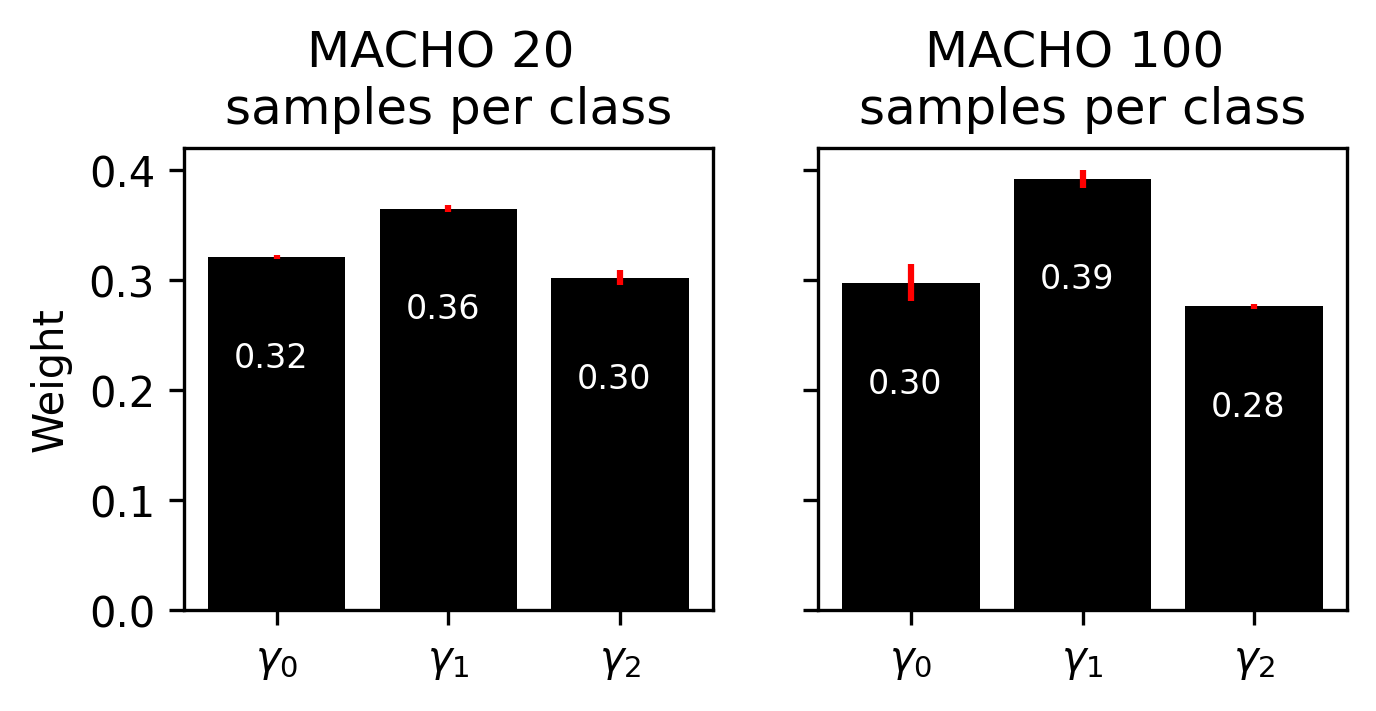

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(5, 2), dpi=300, sharey=True)
x = [r'$\gamma_0$', r'$\gamma_1$', r'$\gamma_2$']

for i, spc in enumerate([20, 100]):
    mean_values = np.mean(results['alcock'][spc], 0)
    std_values = np.std(results['alcock'][spc], 0)
    axes[i].bar(range(len(x)),mean_values, yerr=std_values, color='k', error_kw=dict(ecolor='red'))
    axes[i].set_xticks(range(len(x)))
    axes[i].set_xticklabels(x)
    
    for k, v in enumerate(mean_values):
        axes[i].text(k-0.25, v-0.1, '{:.2f}'.format(v), fontsize=8, color='white')
        
    axes[i].set_title('MACHO {} \nsamples per class'.format(spc))
axes[0].set_ylabel('Weight')
plt.show()

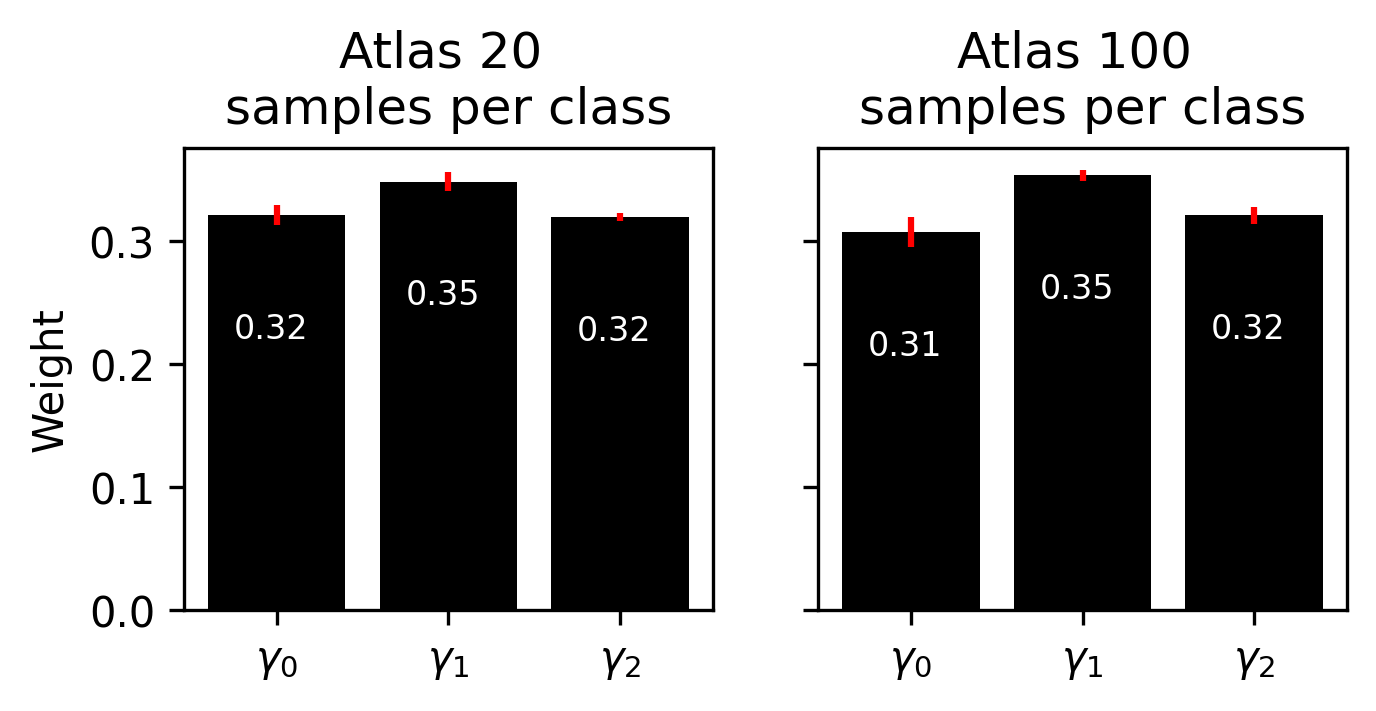

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(5, 2), dpi=300, sharey=True)
x = [r'$\gamma_0$', r'$\gamma_1$', r'$\gamma_2$']

for i, spc in enumerate([20, 100]):
    mean_values = np.mean(results['atlas'][spc], 0)
    std_values = np.std(results['atlas'][spc], 0)
    axes[i].bar(range(len(x)),mean_values, yerr=std_values, color='k', error_kw=dict(ecolor='red'))
    axes[i].set_xticks(range(len(x)))
    axes[i].set_xticklabels(x)
    
    for k, v in enumerate(mean_values):
        axes[i].text(k-0.25, v-0.1, '{:.2f}'.format(v), fontsize=8, color='white')
        
    axes[i].set_title('Atlas {} \nsamples per class'.format(spc))
axes[0].set_ylabel('Weight')
plt.show()